In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)

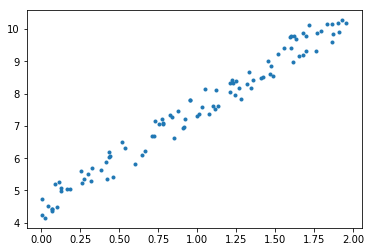

In [8]:
plt.plot(X,y,'.')
plt.show()

#### Exact Equation

Exact Equation is given by: ${\hat{\theta}}$ = $(X^{T}X)^{-1} X^{T} y$

In [18]:
X_b=np.c_[np.ones((100,1)),X] #stacking 1 to X

In [19]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
theta_best

array([[4.53353536],
       [2.96481291]])

Now we can make prediction using ${\hat{\theta}}$

In [21]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # adding 1 to each instances

In [22]:
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.53353536],
       [10.46316118]])

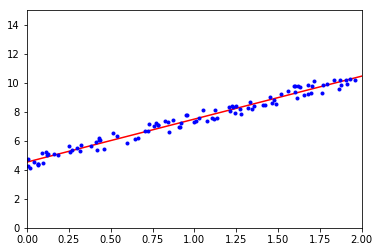

In [24]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

#### Perfoming Linear Regression using Scikit-Learn

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lin_reg=LinearRegression()

In [27]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lin_reg.intercept_,lin_reg.coef_

(array([4.53353536]), array([[2.96481291]]))

In [29]:
lin_reg.predict(X_new)

array([[ 4.53353536],
       [10.46316118]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which can be call directly:

In [30]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)

In [31]:
theta_best_svd

array([[4.53353536],
       [2.96481291]])

This function compute ${\hat{\theta}}$= $X^{+}y$, where $X^{+}$ is the pseudoinverse of $X$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly.

In [41]:
np.linalg.pinv(X_b).dot(y)

array([[4.53353536],
       [2.96481291]])

### Full Gradient Descent

$\nabla_\theta MSE (\theta) =\frac{2}{m} X^T(X\theta - y)$

$\theta^{(next step)} = \theta -\eta \nabla_\theta MSE(\theta)$

In [53]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [54]:
theta=np.random.randn(2,1) # random initialization

In [55]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta=theta - eta * gradients

In [56]:
theta

array([[4.53353536],
       [2.96481291]])

#### Stochastic Gradient Descent

In [57]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [58]:
def learning_schedule(t):
    return t0 / (t + t1)

In [59]:
theta = np.random.randn(2,1) # random initialization

In [60]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients
        

In [61]:
theta

array([[4.52841469],
       [2.9843278 ]])

By convention we iterate by rounds of m iterations; each round is called an epoch.
While the Batch Gradient Descent code iterated 1,000 times through the whole training
set, this code goes through the training set only 50 times and reaches a fairly good
solution

#### SGD Regression using Scikit-Learn

In [62]:
from sklearn.linear_model import SGDRegressor

In [63]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [64]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.53271525]), array([3.00060031]))